In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, add, Flatten, Dense, DepthwiseConv2D


def PEPXModel(input_tensor, filters, name):
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'FP')(input_tensor)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Expansion')(x)
    x = DepthwiseConv2D(kernel_size=(3, 3), activation='relu', padding='same', name=name + 'DWConv3_3')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'SP')(x)
    x = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', name=name + 'Extension')(x)
    return x


def keras_model_build(input_size=(240,240, 3)):
    # input
    input = Input(shape=input_size, name='input')
    x = Conv2D(input_shape=input_size, filters=48, kernel_size=(7, 7), activation='relu', padding='same',
               strides=(1, 1))(input)
    x = MaxPool2D(pool_size=(2, 2))(x)
    # _Conv1x1
    x =Conv2D(filters=160, kernel_size=(1,1), activation= 'relu' ,name = "conv1x1160") (x) 
    # pepx1 
    pepx_11 = PEPXModel(x, 160, "pepx1.1")
    pexp_12 = PEPXModel(add([x,pepx_11]),160, "pepx1.2")
    pexp_13 = PEPXModel(add([x,pepx_11,pexp_12]),160, "pepx1.3")
    #conv1x1
    x = Conv2D(328,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x1328") (add([x,pepx_11,pexp_12,pexp_13]))
    #pepx2
    pepx_21 = PEPXModel(x, 328, "pepx21")
    pepx_22 = PEPXModel(add([x,pepx_21]), 328, "pepx22")
    pepx_23 = PEPXModel(add([x,pepx_21,pepx_22]), 328, "pepx23")
    pepx_24 = PEPXModel(add([x,pepx_21,pepx_22,pepx_23]), 328, "pepx24")
    #conv1x1 
    x = Conv2D(640,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x140") (add([x,pepx_21,pepx_22,pepx_23,pepx_24]))
    #pepx3
    pepx_31 = PEPXModel(x,640,'pepx31')
    pepx_32 = PEPXModel(add([x,pepx_31]),640,'pepx32')
    pepx_33 = PEPXModel(add([x,pepx_31,pepx_32]),640,'pepx33')
    pepx_34 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33]),640,'pepx34')
    pepx_35 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33,pepx_34]),640,'pepx35')
    pepx_36 = PEPXModel(add([x,pepx_31,pepx_32,pepx_33,pepx_34,pepx_35]),640,'pepx36')
    #conv1x1 
    x = Conv2D(2048,kernel_size=(1,1),strides=2, activation = "relu", name = "conv1x12048") (add([x,pepx_31,pepx_32,pepx_33,pepx_34, pepx_35,pepx_36]))
    #pepx4
    pepx_41 = PEPXModel(x,2048,'pepx41')
    pepx_42 = PEPXModel(add([x,pepx_41]),2048,'pepx42')
    pepx_43 = PEPXModel(add([x,pepx_41,pepx_42]),2048,'pepx43')
    # FC
    fla = Flatten()(add([x,pepx_41,pepx_42,pepx_43]))
    d1 = Dense(256, activation='relu')(fla)
    d1 = Dense(128, activation='relu')(d1)
    output = Dense(3, activation='softmax')(d1)
    return keras.models.Model(input, output)

model = keras_model_build()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 240, 240, 48  7104        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 120, 120, 48  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
import numpy as np
import tensorflow as tf


src = "drive/MyDrive/"
x = np.load(src+"Fold-3/data-train-x-3.npy")
y = np.load(src+"Fold-3/data-train-y-3.npy")
model = keras_model_build()
# model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, batch_size=32, epochs=10)
model.save("drive/MyDrive/modelcnn/modelfold3.h5")



Epoch 1/10
109/109 [==============================] - 7401s 68s/step - loss: 0.6344 - accuracy: 0.7327
Epoch 2/10
109/109 [==============================] - 7419s 68s/step - loss: 0.3234 - accuracy: 0.8815
Epoch 3/10
109/109 [==============================] - 7364s 68s/step - loss: 0.2754 - accuracy: 0.9010
Epoch 4/10
109/109 [==============================] - 7384s 68s/step - loss: 0.2274 - accuracy: 0.9137
Epoch 5/10
109/109 [==============================] - 7442s 68s/step - loss: 0.1960 - accuracy: 0.9241
Epoch 6/10
109/109 [==============================] - 7506s 69s/step - loss: 0.1650 - accuracy: 0.9384
Epoch 7/10
109/109 [==============================] - 7502s 69s/step - loss: 0.1548 - accuracy: 0.9428
Epoch 8/10
109/109 [==============================] - 7433s 68s/step - loss: 0.1400 - accuracy: 0.9508
Epoch 9/10
109/109 [==============================] - 7385s 68s/step - loss: 0.1134 - accuracy: 0.9577
Epoch 10/10
109/109 [==============================] - 7341s 67s/step - l

In [ ]:
import numpy as np
import tensorflow as tf

src = "drive/MyDrive/"
xt = np.load(src+"Fold-3/data-test-x-3.npy")
yt = np.load(src+"Fold-3/data-test-y-3.npy")


In [ ]:
import matplotlib.pyplot as plt
def conf_mat(conf_arr, title):
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure(figsize=(8,8))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    ax.set_title(title)
    ax.set_xlabel("Prediksi Class")
    ax.set_ylabel("Target Class")
    
    res = ax.imshow(np.array(norm_conf), cmap="Paired", 
                    interpolation='nearest')
    
    width, height = conf_arr.shape
    textcolors = ["w", "k"]
    for x in range(width):
        for y in range(height):
            ax.text(y, x, str(conf_arr[x][y]),
                    ha="center", va="center",
                    color=textcolors[0.2 < norm_conf[x][y] < 0.9],
                    fontsize=13,
                    weight='bold')
           

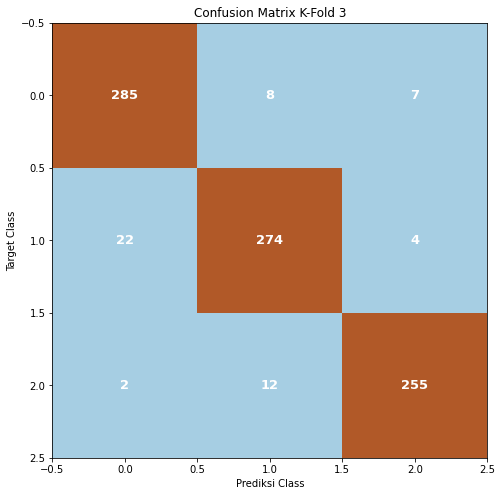

In [ ]:
conf_mat(cm, "Confusion Matrix K-Fold 3" )

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import Sequential, Model, load_model
import time
mod_path2 = "drive/MyDrive/modelcnn/"

LABEL_NAMES = ["COVID","Normal","Pneumonia"]

target_test = np.argmax(yt,axis=1)

mod = load_model(mod_path2+"modelfold3.h5")
awal = time.time()
model = mod.predict(xt)
y_pred = np.argmax(model, axis=1)

print("Hasil K-Fold-1")

cls_report = classification_report(target_test, y_pred, target_names=LABEL_NAMES)

print (cls_report)

acc_score = accuracy_score(target_test, y_pred)
print (acc_score)

cm = confusion_matrix(target_test, y_pred)



print("F1-skor Keseluruhan")

precision = precision_score(target_test, y_pred, average='macro')
recall = recall_score(target_test, y_pred, average='macro')
f1_score = 2 * precision * recall / (precision + recall)
ahir = time.time()
waktu_testing = ahir-awal
print("waktu testing kfold 3",waktu_testing,'detik')
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 Score = ", f1_score)

Hasil K-Fold-1
              precision    recall  f1-score   support

       COVID       0.92      0.95      0.94       300
      Normal       0.93      0.91      0.92       300
   Pneumonia       0.96      0.95      0.95       269

    accuracy                           0.94       869
   macro avg       0.94      0.94      0.94       869
weighted avg       0.94      0.94      0.94       869

0.9367088607594937
F1-skor Keseluruhan
waktu testing kfold 3 347.6121802330017 detik
Precision =  0.9376498342481261
Recall =  0.9370962412226352
F1 Score =  0.9373729560002482


In [ ]:
import matplotlib.pyplot as plt

jumlah = 0
for image, prediction, label in zip(xt, y_pred, target_test ):
  if prediction != label:
    print('has been classified as ',LABEL_NAMES[prediction], 'and should be ', LABEL_NAMES[label])
    jumlah+=1
print(jumlah) 

has been classified as  Pneumonia and should be  COVID
has been classified as  Normal and should be  COVID
has been classified as  Normal and should be  COVID
has been classified as  Normal and should be  COVID
has been classified as  Normal and should be  COVID
has been classified as  Pneumonia and should be  COVID
has been classified as  Pneumonia and should be  COVID
has been classified as  Pneumonia and should be  COVID
has been classified as  Normal and should be  COVID
has been classified as  Normal and should be  COVID
has been classified as  Pneumonia and should be  COVID
has been classified as  Normal and should be  COVID
has been classified as  Pneumonia and should be  COVID
has been classified as  Normal and should be  COVID
has been classified as  Pneumonia and should be  COVID
has been classified as  COVID and should be  Normal
has been classified as  COVID and should be  Normal
has been classified as  COVID and should be  Normal
has been classified as  COVID and should be

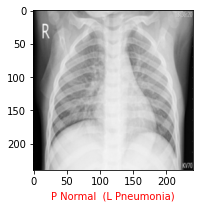

In [ ]:
import matplotlib.pyplot as plt
jumlah = 0
plt.figure(figsize=(20, 20))
plt.subplot(5, 6, 15)
for image, prediction, label in zip(xt, y_pred, target_test ):
  if prediction != label:
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel("P {}  (L {})".format(LABEL_NAMES[prediction],
                                LABEL_NAMES[label]),
                                color='red')
  

nilai fpr = {0: array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00175747, 0.00175747, 0.00351494,
       0.00351494, 0.00527241, 0.00527241, 0.00702988, 0.00702988,
       0.00878735, 0.00878735, 0.01054482, 0.01054482, 0.01230228,
       0.01230228, 0.01405975, 0.01405975, 0.01581722, 0.01581722,
       0.01757469, 0.01757469, 0.01933216, 0.01933216, 0.02460457,
       0.02460457, 0.02987698, 0.02987698, 0.03339192, 0.03339192,
       0.03514938, 0.03514938, 0.04217926, 0.04217926, 0.04393673,
       0.04393673, 0.04745167, 0.04745167, 0.05096661, 0.05096661,
       0.05272408, 0.05272408, 0.05448155, 0.05448155, 0.06326889,
       0.06326889, 0.07908612, 0.07908612, 0.08787346, 0.08787346,
       0.0913884 , 0.0913884 , 0.15641476, 0.15641476, 0.16520211,
       0.16520211, 0.21968366, 0.22319859, 1.        ]), 1: array([0.        , 0.        , 0.        , 0.00175747, 0.00175747,
       0.00351494, 0.00351494, 0.00702988, 0.00702988

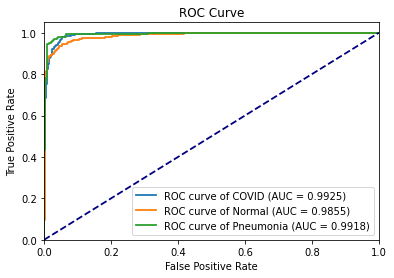

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

def show_roc_curve(y_test_cat, y_pred_prob, target, title):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:,i], y_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  linewidth = 1.8
  plt.figure()
  plt.title(title)
  for i in range(3):
      plt.plot(fpr[i], tpr[i], lw=linewidth, label='ROC curve of %s (AUC = %0.4f)' % (LABEL_NAMES[i], roc_auc[i]))
  plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--')
  print("nilai fpr =",fpr)
  print("nilai tpr =",tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()

show_roc_curve(yt, model, target_test, 'ROC Curve')

0.9902510855301055

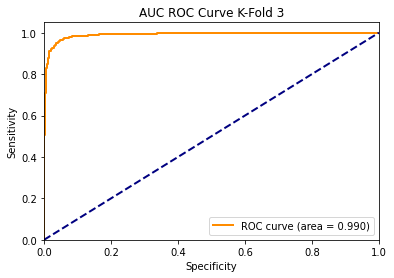

In [ ]:
def create_auc_roc(y_test_cat, y_pred_cat, title):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], model[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), model.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
            lw=lw, label='ROC curve (area = %0.3f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Specificity')
    plt.ylabel('Sensitivity')
    plt.title(title)
    plt.legend(loc="lower right")
    
    return roc_auc["micro"]
create_auc_roc(yt, model, "AUC ROC Curve K-Fold 3" )

Menampilkan grafik roc all 

In [ ]:
import numpy as np
import tensorflow as tf

src = "drive/MyDrive/"
xtest_full = []
ytest_full = []

for kfld in range(1,6):
  xt = np.load(src+"Fold-%s/data-test-x-%s.npy"%(kfld,kfld))
  yt = np.load(src+"Fold-%s/data-test-y-%s.npy"%(kfld,kfld))
  xtest_full.append(xt)
  ytest_full.append(yt)

<h1> Menampilkan confusion matrix dengan label dan menampilkan roc auc semua kfold

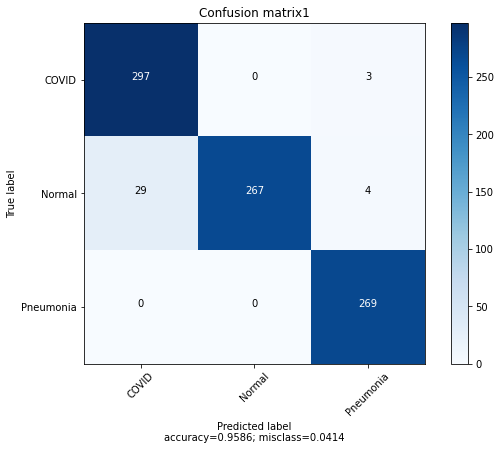

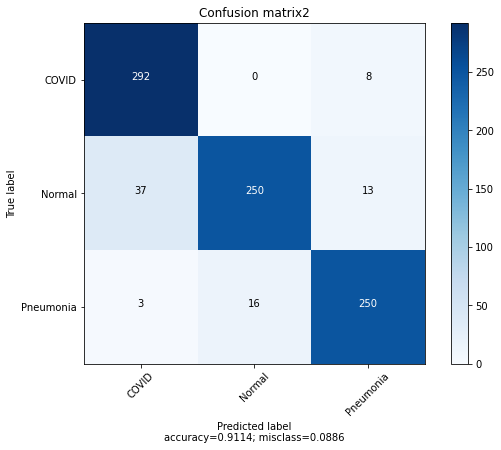

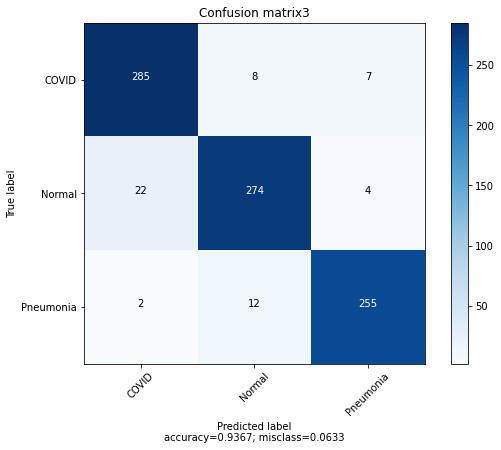

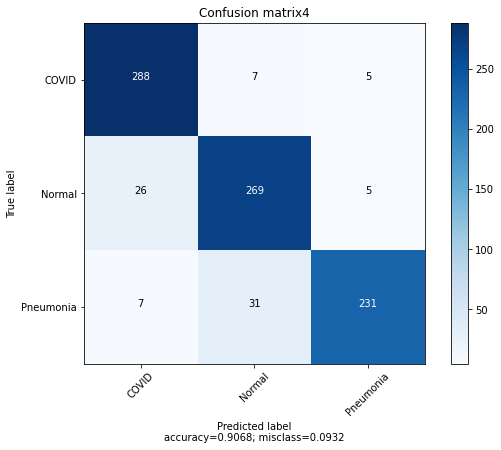

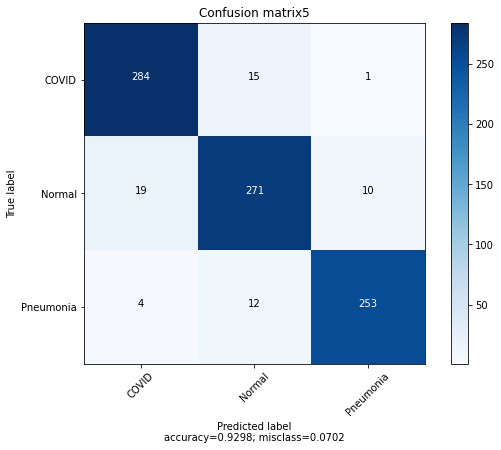

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import Sequential, Model, load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
mod_path2 = "drive/MyDrive/modelcnn/"

LABEL_NAMES = ["COVID","Normal","Pneumonia"]
fpr = dict()
tpr = dict()
roc_auc = dict()
for kfold in range(0,5):
  target_test = np.argmax(ytest_full[kfold],axis=1)

  mod = load_model(mod_path2+"modelfold%s.h5"%(kfold+1))
  model = mod.predict(xtest_full[kfold])
  y_pred = np.argmax(model, axis=1)
  cm = confusion_matrix(target_test, y_pred)
  plot_confusion_matrix(cm,target_names=["COVID","Normal","Pneumonia"],title="Confusion matrix"+str(kfold+1), normalize=False)
  for i in range(3):
    fpr[kfold], tpr[kfold], _ = roc_curve(ytest_full[kfold][:, i], model[:, i])
    roc_auc[kfold] = auc(fpr[kfold], tpr[kfold])
  fpr[kfold], tpr[kfold], _ = roc_curve(ytest_full[kfold].ravel(), model.ravel())
  roc_auc[kfold] = auc(fpr[kfold], tpr[kfold])




In [ ]:
print(roc_auc)

{0: 0.996557025587921, 1: 0.9824633422541683, 2: 0.9902510855301055, 3: 0.981647953217923, 4: 0.9866114643102597}


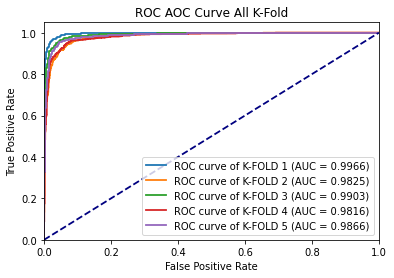

In [ ]:
names =["K-FOLD 1","K-FOLD 2","K-FOLD 3","K-FOLD 4","K-FOLD 5"]
linewidth = 1.8
plt.figure()
plt.title("ROC AOC Curve All K-Fold")
for i in range(5):
    plt.plot(fpr[i], tpr[i], lw=linewidth, label='ROC curve of %s (AUC = %0.4f)' % (names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import itertools 
def plot_confusion_matrix(cm, target_names, title, cmap=None, normalize=True):
  accuracy = np.trace(cm) / np.sum(cm).astype('float')
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
fpr = {0:[0.        , 0.        , 0.        , 0.        , 0.00175747,
       0.00175747, 0.00175747, 0.00351494, 0.00351494, 0.00527241,
       0.00527241, 0.00702988, 0.00702988, 0.00878735, 0.00878735,
       0.01230228, 0.01230228, 0.01581722, 0.01581722, 0.01757469,
       0.01757469, 0.02108963, 0.02108963, 0.0228471 , 0.0228471 ,
       0.02460457, 0.02460457, 0.02636204, 0.02636204, 0.02811951,
       0.02811951, 0.02987698, 0.02987698, 0.03163445, 0.03163445,
       0.03514938, 0.03514938, 0.03690685, 0.03690685, 0.0456942 ,
       0.0456942 , 0.04745167, 0.04745167, 0.04920914, 0.04920914,
       0.05799649, 0.05799649, 0.05975395, 0.05975395, 0.06502636,
       0.06502636, 0.0685413 , 0.0685413 , 0.07029877, 0.07029877,
       0.07908612, 0.07908612, 0.10896309, 0.10896309, 0.11599297,
       0.11599297, 0.13532513, 0.13532513, 0.14235501, 0.14235501,
       0.25483304, 0.25483304, 0.56766257, 0.5711775 , 1.], 1:[0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00175747, 0.00175747, 0.00175747,
       0.00175747, 0.00175747, 0.00175747, 0.00175747, 0.00175747,
       0.00175747, 0.00175747, 0.00175747, 0.00175747, 0.00175747,
       0.00175747, 0.00175747, 0.00351494, 0.00351494, 0.00351494,
       0.00351494, 0.00351494, 0.00351494, 0.00351494, 0.00527241,
       0.00527241, 0.00878735, 0.00878735, 0.01054482, 0.01054482,
       0.01230228, 0.01230228, 0.01405975, 0.01405975, 0.01581722,
       0.01581722, 0.01757469, 0.01757469, 0.01933216, 0.01933216,
       0.02460457, 0.02460457, 0.02636204, 0.02636204, 0.03514938,
       0.03514938, 0.0456942 , 0.0456942 , 0.06502636, 0.06502636,
       0.07381371, 0.07381371, 0.07557118, 0.07557118, 0.08084359,
       0.08084359, 0.09490334, 0.09490334, 0.10017575, 0.10017575,
       0.10193322, 0.10193322, 0.10369069, 0.10369069, 0.11599297,
       0.11599297, 0.18453427, 0.18453427, 0.20386643, 0.20386643,
       0.21616872, 0.21616872, 0.23198594, 0.23198594, 0.26537786,
       0.26537786, 0.28119508, 0.28119508, 0.31458699, 0.31458699,
       0.32688928, 0.32688928, 0.33391916, 0.33391916, 0.41827768,
       0.41827768, 0.42003515, 0.42003515, 0.46397188, 0.46397188,
       0.50439367, 0.50439367, 0.64850615, 0.64850615, 0.75219684,
       0.75219684, 0.90685413, 0.90685413, 1.],2:[0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.00666667, 0.00666667, 0.00833333, 0.00833333, 0.01      ,
       0.01      , 0.01333333, 0.01333333, 0.015     , 0.015     ,
       0.01666667, 0.01666667, 0.01833333, 0.01833333, 0.02666667,
       0.02666667, 0.03      , 0.03      , 0.03333333, 0.03333333,
       0.03666667, 0.03666667, 0.04166667, 0.04166667, 0.05833333,
       0.05833333, 0.095     , 0.095     , 0.11833333, 0.11833333,
       0.12666667, 0.12666667, 0.14333333, 0.14333333, 0.15833333,
       0.15833333, 0.17166667, 0.17166667, 0.47833333, 0.48166667,
       0.495     , 0.495     , 0.69      , 0.69      , 1.        ] ,3:[0.    , 0.015     ,
       0.495     , 0.495     , 0.69      , 0.69      , 1.        ],4:[0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00166667, 0.00166667,
       0.00333333, 0.00333333, 0.005     , 0.005     , 0.00833333,
       0.00833333, 1.        ] }
tpr = {0:[0.        , 0.01333333, 0.02      , 0.09      , 0.09      ,
       0.09666667, 0.25666667, 0.25666667, 0.39333333, 0.39333333,
       0.52333333, 0.52333333, 0.53333333, 0.53333333, 0.64      ,
       0.64      , 0.73666667, 0.73666667, 0.77      , 0.77      ,
       0.78666667, 0.78666667, 0.79      , 0.79      , 0.82      ,
       0.82      , 0.84666667, 0.84666667, 0.85      , 0.85      ,
       0.86666667, 0.86666667, 0.92333333, 0.92333333, 0.93333333,
       0.93333333, 0.93666667, 0.93666667, 0.94      , 0.94      ,
       0.94666667, 0.94666667, 0.95      , 0.95      , 0.95666667,
       0.95666667, 0.96333333, 0.96333333, 0.96666667, 0.96666667,
       0.97      , 0.97      , 0.97333333, 0.97333333, 0.98      ,
       0.98      , 0.98333333, 0.98333333, 0.98666667, 0.98666667,
       0.99      , 0.99      , 0.99333333, 0.99333333, 0.99666667,
       0.99666667, 1.        , 1.        , 1.        , 1.        ], 1:[0.        , 0.02333333, 0.03      , 0.03333333, 0.04      ,
       0.05666667, 0.07      , 0.08      , 0.09      , 0.1       ,
       0.10666667, 0.12333333, 0.15666667, 0.16      , 0.17      ,
       0.17666667, 0.19      , 0.19333333, 0.2       , 0.21333333,
       0.22333333, 0.25      , 0.25666667, 0.27      , 0.27666667,
       0.30666667, 0.31333333, 0.33666667, 0.34333333, 0.34666667,
       0.35333333, 0.39      , 0.39      , 0.39666667, 0.40333333,
       0.41      , 0.47666667, 0.48333333, 0.71333333, 0.71333333,
       0.73333333, 0.73333333, 0.74      , 0.74      , 0.75      ,
       0.75      , 0.81      , 0.81      , 0.83      , 0.83      ,
       0.84666667, 0.84666667, 0.86333333, 0.86333333, 0.87      ,
       0.87      , 0.87333333, 0.87333333, 0.87666667, 0.87666667,
       0.89333333, 0.89333333, 0.89666667, 0.89666667, 0.90333333,
       0.90333333, 0.90666667, 0.90666667, 0.91      , 0.91      ,
       0.91666667, 0.91666667, 0.93      , 0.93      , 0.93666667,
       0.93666667, 0.94      , 0.94      , 0.94333333, 0.94333333,
       0.94666667, 0.94666667, 0.95      , 0.95      , 0.95333333,
       0.95333333, 0.95666667, 0.95666667, 0.96      , 0.96      ,
       0.96333333, 0.96333333, 0.96666667, 0.96666667, 0.97      ,
       0.97      , 0.97333333, 0.97333333, 0.97666667, 0.97666667,
       0.98      , 0.98      , 0.98333333, 0.98333333, 0.98666667,
       0.98666667, 0.99      , 0.99      , 0.99333333, 0.99333333,
       0.99666667, 0.99666667, 1.        , 1.        ],2: [0.        , 0.00371747, 0.79925651, 0.79925651, 0.81040892,
       0.81040892, 0.82527881, 0.82527881, 0.82899628, 0.82899628,
       0.85873606, 0.85873606, 0.86245353, 0.86245353, 0.87732342,
       0.87732342, 0.89219331, 0.89219331, 0.91449814, 0.91449814,
       0.92193309, 0.92193309, 0.94795539, 0.94795539, 0.95539033,
       0.95539033, 0.95910781, 0.95910781, 0.96282528, 0.96282528,
       0.96654275, 0.96654275, 0.97026022, 0.97026022, 0.9739777 ,
       0.9739777 , 0.97769517, 0.97769517, 0.98513011, 0.98513011,
       0.98884758, 0.98884758, 0.99256506, 0.99256506, 0.99256506,
       0.99256506, 0.99628253, 0.99628253, 1.        , 1.]  ,3:[0.        , 0.96282528, 0.96282528, 0.96282528, 0.96282528,
       1.        , 1.        ],4: [0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.00666667, 0.00666667, 0.00833333, 0.00833333, 0.01      ,
       0.01      , 0.01333333, 0.01333333, 0.015     , 0.015     ,
       0.96282528     , 0.96282528     , 0.96282528      , 0.96282528     , 1.        ]}
roc_auc = {0: 0.996557025587921, 1: 0.9824633422541683, 2: 0.9902510855301055, 3: 0.981647953217923, 4: 0.9866114643102597}

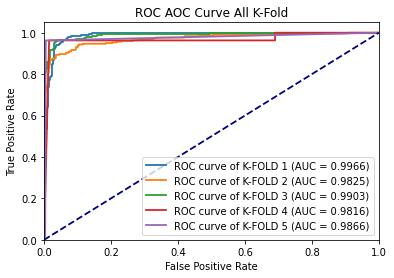

In [ ]:
names =["K-FOLD 1","K-FOLD 2","K-FOLD 3","K-FOLD 4","K-FOLD 5"]
linewidth = 1.8
plt.figure()
plt.title("ROC AOC Curve All K-Fold")
for i in range(5):
    plt.plot(fpr[i], tpr[i], lw=linewidth,label='ROC curve of %s (AUC = %0.4f)' % (names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()